# 使用实时编辑器创建交互式表单

以下示例说明如何使用实时编辑器创建一个交互式表单，该表单根据用户提供的输入完成计算。该示例使用下拉菜单和滑块提示用户进行输入，然后使用按钮根据提供的输入运行计算。该示例隐藏了代码，只向用户显示控件和结果。

In [2]:
import numpy as np
from bokeh.layouts import column, row
from bokeh.models import CustomJS, Slider
from bokeh.plotting import ColumnDataSource, figure, show
x = np.linspace(0, 10, 500)
y = np.sin(x)
source = ColumnDataSource(data=dict(x=x, y=y))
plot = figure(y_range=(-10, 10), width=400, height=400)
plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)
amp_slider = Slider(start=0.1, end=10, value=1, step=.1, title="Amplitude")
freq_slider = Slider(start=0.1, end=10, value=1, step=.1, title="Frequency")
phase_slider = Slider(start=0, end=6.4, value=0, step=.1, title="Phase")
offset_slider = Slider(start=-5, end=5, value=0, step=.1, title="Offset")

callback = CustomJS(args=dict(source=source, amp=amp_slider, freq=freq_slider, phase=phase_slider, offset=offset_slider),
                    code="""
    const data = source.data;
    const A = amp.value;
    const k = freq.value;
    const phi = phase.value;
    const B = offset.value;
    const x = data['x']
    const y = data['y']
    for (let i = 0; i < x.length; i++) {
        y[i] = B + A*Math.sin(k*x[i]+phi);
    }
    source.change.emit();
""")
amp_slider.js_on_change('value', callback)
freq_slider.js_on_change('value', callback)
phase_slider.js_on_change('value', callback)
offset_slider.js_on_change('value', callback)

layout = row(
    plot,
    column(amp_slider, freq_slider, phase_slider, offset_slider),
)

show(layout)

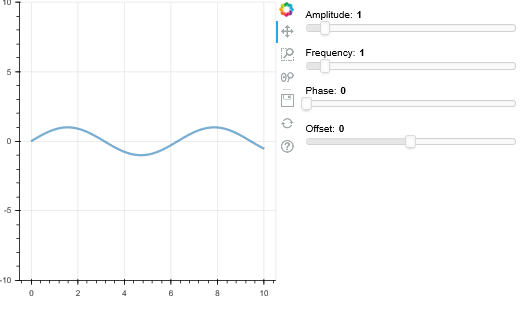